In [9]:
import numpy as np
import pandas as pd
import requests
import librosa
from io import BytesIO
import matplotlib.pyplot as plt

In [3]:
d = pd.read_csv('/Volumes/COCO-DATA/0000764-250426092105405/occurrence.txt', sep='\t', skiprows=[5644])

/var/folders/l2/p5w_f2bx6cz7b2p1jb5y5kn00000gn/T/ipykernel_74528/3480027360.py:1: DtypeWarning: Columns (46,208) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv('/Volumes/COCO-DATA/0000764-250426092105405/occurrence.txt', sep='\t', skiprows=[5644])


In [4]:
with open('/Volumes/COCO-DATA/0000764-250426092105405/bird_species.txt') as f:
    rows = []
    row = []
    for l in f:
        if not (l.startswith('Lahko') or l.startswith('Heimo') or l.strip() == 'C' or l.strip() == 'B') and l.strip():
            row.append(l.strip())
            if (len(row) == 5):
                rows.append(row)
                row = []

species = pd.DataFrame(rows, columns=['abb', 'scientific', 'finnish', 'swedish', 'english'])
species = species.loc[:, ['scientific', 'finnish', 'english']]
print(species)

                 scientific          finnish                english
0               Cygnus olor     kyhmyjoutsen              Mute Swan
1        Cygnus columbianus     pikkujoutsen          Bewick's Swan
2             Cygnus cygnus     laulujoutsen           Whooper Swan
3             Anser fabalis       metsähanhi             Bean Goose
4      Anser brachyrhynchus  lyhytnokkahanhi      Pink-footed Goose
..                      ...              ...                    ...
487    Emberiza schoeniclus       pajusirkku           Reed Bunting
488        Emberiza pallasi  pikkupajusirkku  Pallas's Reed Bunting
489      Emberiza bruniceps   ruskopääsirkku     Red-headed Bunting
490  Emberiza melanocephala   mustapääsirkku   Black-headed Bunting
491       Emberiza calandra     harmaasirkku           Corn Bunting

[492 rows x 3 columns]


In [5]:
cols = [ 'gbifID', 'species', 'decimalLatitude', 'decimalLongitude' ]
d = d.loc[:, cols]
occurences = d[d['species'].isin(species['scientific'])]
print(occurences.head())

        gbifID                 species  decimalLatitude  decimalLongitude
3   4173214155     Emberiza citrinella          48.7565           -1.5103
6   2243564691       Passer domesticus          49.9137           -6.3015
7   4173214157         Sylvia communis          54.1244           -0.5509
13  4173214160  Acrocephalus palustris          51.2389           12.3872
17  4173214162          Motacilla alba          53.0577           14.3099


In [15]:
multimedia_df = pd.read_csv('/Volumes/COCO-DATA/0000764-250426092105405/multimedia.txt', sep='\t')

In [16]:
multimedia_df = multimedia_df[multimedia_df['gbifID'].isin(occurences['gbifID'])]
multimedia_df = multimedia_df[multimedia_df['format'] == 'audio/mpeg']
multimedia_df = multimedia_df.reset_index(drop=True)

In [ ]:
test = multimedia_df.loc[:99999, :]
for id, url in zip(test['gbifID'].values, test['identifier'].values):
    try:
        res = requests.get(url)
        path = f"/Volumes/COCO-DATA/songs/{id}"

        if not os.path.isfile('/Volumes/COCO-DATA/songs/2243666539')
        with open(path, 'wb+') as f:
            f.write(bytes(res.content))
    except:
        continue

In [4]:
array, fr = librosa.load('/Users/okkokuisma/Downloads/XC815854-MIXPRE-013.wav')

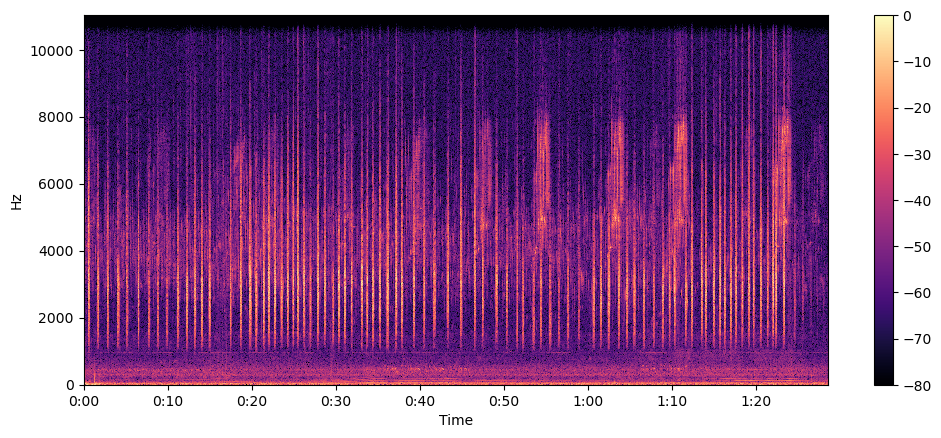

In [10]:
D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

In [57]:
D_abs = np.abs(D)
D_max = np.max(D_abs)
D_normalized = D_abs / D_max
col_means = np.mean(D_normalized, axis=0)
row_means = np.mean(D_normalized, axis=1)
mask = (D_normalized >= 2.5 * col_means) & (D_normalized >= 2.5 * row_means.reshape((1025,1)))

In [55]:
print(np.abs(D))
print(np.where(mask, D_abs, 0))

[[9.3767685e-01 2.0670843e+00 1.7745852e+00 ... 4.2626405e-01
  5.7218331e-01 3.0716079e-01]
 [1.0902920e+00 1.1336092e+00 1.9080033e+00 ... 1.2460274e-01
  4.2775512e-01 4.4596291e-01]
 [1.1544011e+00 1.4635057e+00 2.4883406e+00 ... 1.7618243e-01
  2.9059395e-01 3.5976887e-01]
 ...
 [1.1731770e-03 6.0786481e-04 3.0143980e-07 ... 1.0431826e-07
  2.5677391e-05 2.7729757e-04]
 [1.1687846e-03 6.0579524e-04 3.2704443e-07 ... 7.5831998e-08
  2.5669899e-05 2.7727260e-04]
 [1.1674425e-03 6.0510979e-04 3.1427714e-07 ... 7.6351888e-08
  2.5674603e-05 2.7727455e-04]]
[[0.        2.0670843 1.7745852 ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        2.4883406 ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


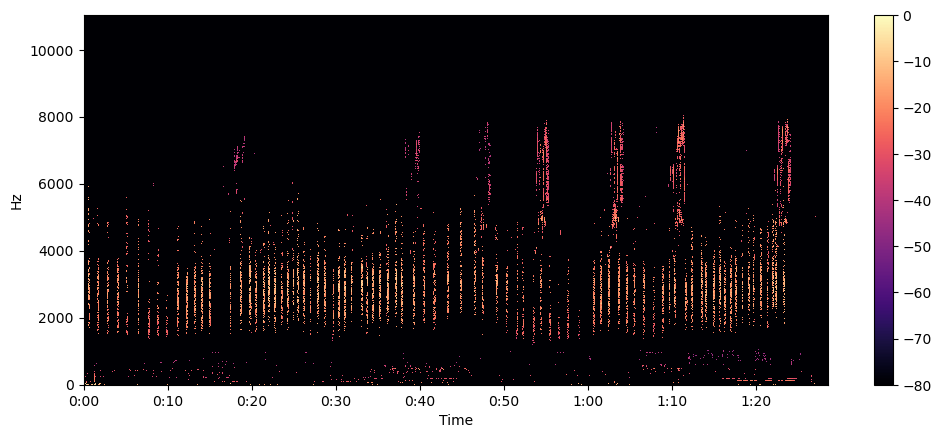

In [58]:
S_db = librosa.amplitude_to_db(np.where(mask, D_abs, 0), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()